<a href="https://colab.research.google.com/github/Songurdevoloper/Image-compression-via-SVD/blob/main/Image_compressing_via_SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import PIL, Matplotlib and NumPy libraries**

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

**Download any image from colab or github to here**

if with github:
- wget (this place for link of github image raw)
if with colab
- Files > Upload to session storage

let's go to work with this image


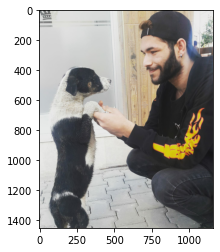

In [2]:
# You can open image with (PIL-Image) and illustrate it with Matplotlib
img = Image.open("imgsvd.jpg")
_ = plt.imshow(img)

Convert image to grayscale so that we don't have to deal with the complexity of multiple color channels:

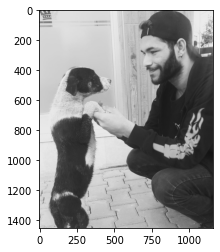

In [3]:
imggray = img.convert('LA')
_ = plt.imshow(imggray)

Convert data into numpy matrix, which doesn't impact image data:

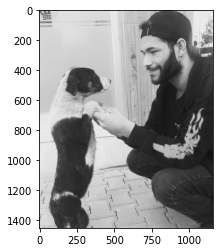

In [4]:
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
_ = plt.imshow(imgmat, cmap='gray')

Calculate SVD of the Image:

In [5]:
U, sigma, V = np.linalg.svd(imgmat)

As eigenvalues are arranged in descending order in diag(λ) so to are singular values, by convention, arranged in descending order in D (or in this code, diag(σ)). Thus, the first left-singular vector of U and first right-singular vector of V may represent the most prominent feature of the image:

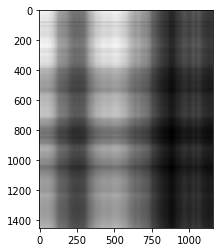

In [6]:
reconstimg = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(V[:1, :])
_ = plt.imshow(reconstimg, cmap='gray')

Additional singular vectors improve the image quality:

> 📓 **Note:**  Below of this text you can add your spesific values to improve image quality (if you add more singular vectors then image quality will grow up! but if you bring down singular vectors the quality will reduce each time

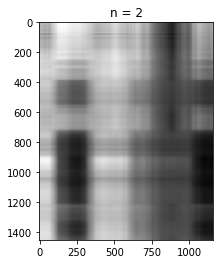

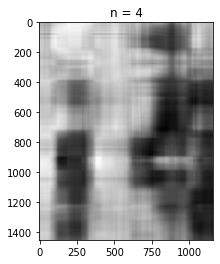

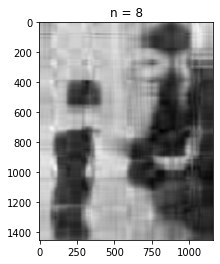

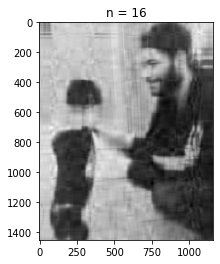

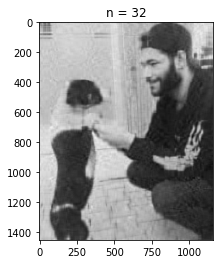

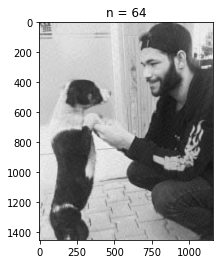

In [7]:
for i in [2, 4, 8, 16, 32, 64]:
  reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
  _ = plt.imshow(reconstimg, cmap='gray')
  title = "n = %s" % i
  plt.title(title)
  plt.show()

With 64 singular vectors, the image reconstructed quite well, however the data footprint is much smaller than the original image:

In [8]:
imgmat.shape

(1452, 1160)

In [9]:
full_representation = 1452 * 1160
full_representation

1684320

In [10]:
svd64_rep = 64*1452 + 64 + 64*1160
svd64_rep

167232

In [11]:
svd64_rep / full_representation

0.09928754630948988

Specifically, the image represented as 64 singular vectors in **99.2%** of the size of the original!

Alongside images, we can use singular vectors for dramatic, lossy compression of other types of media files